In [7]:
from pycaret.classification import *
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')
os.chdir('/Users/hiksang/Desktop/Proj/DF/data')  # 추후 DB로 변환

df=pd.read_csv('preprocess_noYearBank.csv',encoding='utf-8',na_values=[' '])

df_pred = df.dropna()
df_pred.reset_index(inplace = True, drop = True)
df_pred.drop(columns='index', inplace = True)
df_pred.head()
len(df_pred)

567

(1.549877211867971, <Axes: xlabel='KV001', ylabel='Density'>)

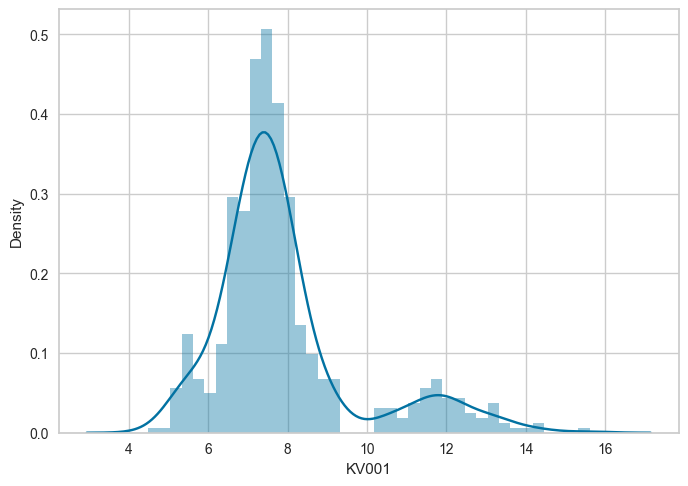

In [8]:
KV001 = df_pred['KV001']
KV001.skew(),sns.distplot(df_pred['KV001'], kde = True)

In [ ]:
# ## 데이터 치우침 문제가 원인인 줄 알았으나 그게 아니고 클래스 중 샘플을 2개 미만으로 가지고 있어서 그럼. 변수를 구간화 해주어야할 듯
# # 방법 1 log 변환 해보기
# df_log = np.log(df_pred['KV001'])
# df_log.skew(),sns.distplot(df_log) # 왜도: 1.549877211867971 -> 0.9007076595505006

# # 방법 2 루트 변환
# df_root = np.sqrt(df_pred['KV001'])
# df_root.skew(),sns.distplot(df_root) # 왜도 1.549877211867971 -> 1.239290480238273

# # 방법 3 Box-Cox 변환 -> 비정규 종속 변수를 정규 모양으로 변환하는 방법
# from scipy import stats
# df_boxcox = pd.Series(stats.boxcox(df_pred['KV001'])[0])
# df_boxcox

# df_boxcox.skew(),sns.distplot(df_boxcox) # 왜도 1.549877211867971 -> -0.04743707563974001

# df_log = df_root.rename('KV001_log')#

# # # boxcox 변환한 열을 KV001 대체
# # df_pred = pd.concat([df_log,df_pred],axis = 1)
# # df_pred

# # df_pred = df_pred.rename(columns = {0:'KV001_boxcox'})
# # df_pred.head()

# # df_pred.drop(columns = 'KV001', inplace = True)
# # df_pred

In [ ]:
# 3분위수까지 최댓값 15에 비해 8밖에 안됨.
KV001.describe()

count    567.000000
mean       7.891469
std        1.814835
min        4.469674
25%        6.922164
50%        7.449708
75%        8.105423
max       15.611246
Name: KV001, dtype: float64

In [ ]:
# cut: 데이터를 동일한 길이로 구간화 가능. (구간 길이(최댓값 -최솟값) 초점  -> 내가 조정할 값)
# qcut: 데이터 길이는 자동적으로 맞춰지고 구간마다 같은 데이터의 개수가 들어감(데이터 개수에 초점 -> 내가 조정할 값)
# 각 사분위수를 경계값으로 해 볼것임.
KV001.reset_index(drop = True, inplace = True)
KV001, bins = pd.qcut(KV001, q = 4, retbins = True, labels = [f'range_{i}' for i in range(0,4)])
KV001, bins

(0      range_2
 1      range_1
 2      range_1
 3      range_1
 4      range_1
         ...   
 562    range_1
 563    range_1
 564    range_0
 565    range_0
 566    range_1
 Name: KV001, Length: 567, dtype: category
 Categories (4, object): ['range_0' < 'range_1' < 'range_2' < 'range_3'],
 array([ 4.4696738 ,  6.92216373,  7.44970771,  8.10542255, 15.61124604]))

In [ ]:
df_pred['KV001'] = KV001
df_pred

,KV001,KV002,KV003,KV004,KV005,KV006,KV007,KV008,KV009,KV010,KV011,KV012,KV013,KV014,KV015,KV016,KV017,KV018
0,range_2,11.230069,12.892386,0.647280,-8.069694,4.787695,29.034507,-1.752446,31.547587,4.417577,96.510839,3.108897,3.328412,-2.681132,-25.238069,24.506420,96.638808,-9.084048
1,range_1,11.509397,12.977475,0.495335,-1.847013,0.894125,29.547321,2.671965,32.670500,4.259731,96.682896,0.505023,0.182472,0.312864,4.506754,21.528201,5.391553,1.164575
2,range_1,11.553702,13.024878,0.820232,-3.768500,2.526414,29.872508,-0.054115,32.198713,4.223614,95.086961,1.079153,0.713768,0.106465,28.660505,18.974260,21.322032,15.309219
3,range_1,11.589960,13.047304,1.212506,-5.585090,4.531546,31.057246,1.154366,32.394182,4.220511,96.365554,1.488744,1.076029,0.136478,45.932303,21.164867,33.418492,42.007045
4,range_1,9.064114,10.816283,1.009559,-7.276591,3.756003,30.998928,0.018562,31.168660,3.382929,94.943455,1.498435,1.453273,-0.443714,-20.013017,27.607346,45.049917,83.792845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,range_1,10.968299,13.063094,1.878980,-3.793386,0.956893,34.626846,1.737244,40.267279,0.986555,99.344673,1.430985,0.555365,1.323615,86.837924,64.717433,19.230542,358.380380
563,range_1,10.815314,12.733773,0.526592,-1.247132,4.581053,34.833039,2.200539,39.585022,1.014208,98.568201,-0.531786,0.079552,0.447040,-61.573850,0.621701,2.771032,51.347226
564,range_0,10.665785,12.534142,1.030550,-2.661936,2.664026,34.366872,2.805829,39.109203,0.898691,96.192528,-1.478574,0.318522,0.712028,-3.494356,62.240823,10.946595,186.869317
565,range_0,10.670107,12.508762,1.514801,-4.543245,1.043397,34.195223,2.198896,39.358875,0.957222,101.278477,-2.278478,0.369362,1.145439,50.944604,27.264489,12.630425,174.716676


In [ ]:
classification = setup(df_pred, target = 'KV001', train_size =0.8)

,Description,Value
0,Session id,6010
1,Target,KV001
2,Target type,Multiclass
3,Target mapping,"range_0: 0, range_1: 1, range_2: 2, range_3: 3"
4,Original data shape,"(567, 18)"
5,Transformed data shape,"(567, 18)"
6,Transformed train set shape,"(453, 18)"
7,Transformed test set shape,"(114, 18)"
8,Numeric features,17
9,Preprocess,True


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7598,0.9290,0.7598,0.7771,0.7558,0.6795,0.6858,1.8700
gbc,Gradient Boosting Classifier,0.7554,0.9217,0.7554,0.7811,0.7561,0.6735,0.6803,3.5940
lightgbm,Light Gradient Boosting Machine,0.7422,0.9136,0.7422,0.7576,0.7410,0.6561,0.6613,1.9200
xgboost,Extreme Gradient Boosting,0.7311,0.9134,0.7311,0.7542,0.7299,0.6409,0.6480,1.8690
catboost,CatBoost Classifier,0.7269,0.9122,0.7269,0.7462,0.7258,0.6354,0.6412,6.2590
rf,Random Forest Classifier,0.7266,0.9206,0.7266,0.7395,0.7215,0.6352,0.6411,2.3580
dt,Decision Tree Classifier,0.6360,0.7568,0.6360,0.6406,0.6295,0.5140,0.5191,1.8640
lda,Linear Discriminant Analysis,0.6154,0.8538,0.6154,0.6572,0.6193,0.4865,0.4957,1.7660
qda,Quadratic Discriminant Analysis,0.6118,0.8499,0.6118,0.6631,0.6029,0.4822,0.4978,3.1790
lr,Logistic Regression,0.5694,0.8225,0.5694,0.5816,0.5681,0.4256,0.4288,3.0970


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [ ]:
gbc = create_model('gbc',cross_validation=True)
xgb = create_model('xgboost',cross_validation=True)
lightgbm = create_model('lightgbm',cross_validation=True)
lr = create_model('lr',cross_validation=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5870,0.8699,0.5870,0.6202,0.5903,0.4510,0.4591
1,0.8261,0.9654,0.8261,0.8497,0.8178,0.7672,0.7767
2,0.6739,0.9041,0.6739,0.6948,0.6817,0.5647,0.5657
3,0.8000,0.9769,0.8000,0.8198,0.7939,0.7332,0.7436
4,0.7333,0.8965,0.7333,0.7473,0.7361,0.6438,0.6459
5,0.8000,0.9423,0.8000,0.8311,0.8058,0.7332,0.7396
6,0.8222,0.9235,0.8222,0.8142,0.8141,0.7627,0.7652
7,0.8000,0.9411,0.8000,0.8203,0.7968,0.7325,0.7409
8,0.6667,0.8482,0.6667,0.7533,0.6831,0.5545,0.5670


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6087,0.8670,0.6087,0.6430,0.6090,0.4799,0.4870
1,0.8043,0.9585,0.8043,0.8086,0.7961,0.7385,0.7437
2,0.6087,0.8873,0.6087,0.6179,0.6062,0.4769,0.4797
3,0.7556,0.9609,0.7556,0.7843,0.7447,0.6737,0.6889
4,0.7111,0.9056,0.7111,0.7279,0.7156,0.6144,0.6164
5,0.7556,0.9247,0.7556,0.8018,0.7596,0.6741,0.6864
6,0.8222,0.9484,0.8222,0.8192,0.8174,0.7628,0.7649
7,0.7778,0.9047,0.7778,0.7963,0.7794,0.7028,0.7084
8,0.6667,0.8312,0.6667,0.7311,0.6754,0.5536,0.5653


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5870,0.8652,0.5870,0.6061,0.5881,0.4507,0.4561
1,0.8043,0.9628,0.8043,0.8133,0.7923,0.7383,0.7469
2,0.6087,0.8762,0.6087,0.6161,0.6118,0.4776,0.4779
3,0.8000,0.9577,0.8000,0.8393,0.7929,0.7328,0.7473
4,0.7556,0.9128,0.7556,0.7592,0.7559,0.6737,0.6746
5,0.7556,0.9220,0.7556,0.7802,0.7560,0.6741,0.6823
6,0.8444,0.9431,0.8444,0.8438,0.8416,0.7925,0.7941
7,0.7778,0.9089,0.7778,0.7778,0.7778,0.7036,0.7036
8,0.6444,0.8460,0.6444,0.6792,0.6545,0.5254,0.5289


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4348,0.7621,0.4348,0.4728,0.4395,0.2497,0.2550
1,0.7391,0.9212,0.7391,0.7415,0.7336,0.6520,0.6557
2,0.6087,0.8218,0.6087,0.5984,0.6019,0.4776,0.4785
3,0.5111,0.8376,0.5111,0.5016,0.4983,0.3483,0.3513
4,0.6889,0.8820,0.6889,0.7108,0.6898,0.5847,0.5890
5,0.5556,0.8234,0.5556,0.5517,0.5513,0.4063,0.4074
6,0.5778,0.8223,0.5778,0.6163,0.5901,0.4379,0.4417
7,0.5778,0.8109,0.5778,0.5850,0.5759,0.4364,0.4384
8,0.3556,0.7146,0.3556,0.3697,0.3519,0.1386,0.1410


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
save_model(gbc, 'gbc_model')
save_model(xgb, 'xgb_model')
save_model(lightgbm, 'lightgbm_model')
save_model(lr, 'lr_model')

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\siyou\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['KV002', 'KV003', 'KV004', 'KV005',
                                              'KV006', 'KV007', 'KV008', 'KV009',
                                              'KV010', 'KV011', 'KV012', 'KV013',
                                              'KV0...
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='most_frequent',
                                                               verbose='deprec

In [ ]:
gbc_model = load_model('gbc_model')
evaluate_model(gbc_model)

Transformation Pipeline and Model Successfully Loaded


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_gbc=predict_model(gbc_model)
pred_gbc.head(20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7281,0.9210,0.7281,0.7327,0.7283,0.6374,0.6387


,KV002,KV003,KV004,KV005,KV006,KV007,KV008,KV009,KV010,KV011,KV012,KV013,KV014,KV015,KV016,KV017,KV018,KV001,prediction_label,prediction_score
242,10.480713,11.738221,0.468225,-1.560147,-1.591850,32.436329,1.390175,44.463768,1.262696,94.762238,-2.343781,0.171770,0.296455,-50.470337,24.339174,5.571589,16.876345,2,range_2,0.7673
41,13.999291,13.999291,0.235885,15.108701,1.384524,30.529902,4.548868,12.850151,2.602051,85.480759,1.057854,0.644606,-0.408722,14.130612,18.781027,19.679773,48.333523,2,range_2,0.9212
363,11.510423,13.103530,0.620427,-0.168618,-0.213007,10.819642,2.641326,56.821381,2.009763,177.322205,-0.706204,0.283221,0.337206,-88.384720,0.193109,3.064353,56.782452,0,range_0,0.6263
7,8.499445,10.444828,1.018831,-4.043146,5.367716,31.612507,4.458357,31.287092,2.778703,96.573952,1.090974,1.250956,-0.232125,163.680328,39.360790,39.545853,156.957489,0,range_0,0.9479
279,12.020108,12.071613,2.267169,-4.508538,0.312565,34.659214,0.330263,42.111637,2.085733,99.231415,3.538245,0.778759,1.488409,-91.332283,23.210754,26.991188,58.786804,3,range_3,0.5707
465,13.961740,14.719790,0.583284,-0.945058,1.769340,31.612337,4.059381,29.326420,0.812627,93.607117,1.327557,0.103737,0.479547,0.518272,-71.423546,3.279376,9.447883,0,range_0,0.9106
55,16.815857,16.815857,1.173685,2.844214,-0.336084,35.721786,1.873119,11.563026,1.343776,85.908920,4.340420,-0.104126,1.277811,-31.950336,27.697477,-3.719549,-10.299433,1,range_2,0.6471
108,21.376219,21.376219,1.023903,-4.366181,-22.402988,15.287907,-11.893897,8.153977,3.199667,58.469151,-0.314129,0.320793,0.703110,10.554193,12.189333,4.904254,67.840546,3,range_3,0.9909
16,11.128774,13.234529,1.720189,-3.812668,2.069024,35.903877,1.333005,30.003025,1.405833,92.372475,4.335790,0.843892,0.876298,-56.602360,18.046349,30.298988,55.356251,0,range_0,0.9657
551,11.196638,13.062261,0.638779,-1.705171,1.281666,31.986139,1.895307,38.600204,2.362212,108.187424,-0.922143,-0.051883,0.690661,-43.814671,24.001368,-1.659523,-5.026695,1,range_1,0.8920


In [ ]:
xgb_model = load_model('xgb_model')
evaluate_model(xgb_model)

Transformation Pipeline and Model Successfully Loaded


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_xgb=predict_model(xgb_model)
pred_xgb.head(20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7807,0.9351,0.7807,0.7849,0.7805,0.7076,0.7090


,KV002,KV003,KV004,KV005,KV006,KV007,KV008,KV009,KV010,KV011,KV012,KV013,KV014,KV015,KV016,KV017,KV018,KV001,prediction_label,prediction_score
242,10.480713,11.738221,0.468225,-1.560147,-1.591850,32.436329,1.390175,44.463768,1.262696,94.762238,-2.343781,0.171770,0.296455,-50.470337,24.339174,5.571589,16.876345,2,range_2,0.7649
41,13.999291,13.999291,0.235885,15.108701,1.384524,30.529902,4.548868,12.850151,2.602051,85.480759,1.057854,0.644606,-0.408722,14.130612,18.781027,19.679773,48.333523,2,range_2,0.9746
363,11.510423,13.103530,0.620427,-0.168618,-0.213007,10.819642,2.641326,56.821381,2.009763,177.322205,-0.706204,0.283221,0.337206,-88.384720,0.193109,3.064353,56.782452,0,range_1,0.4582
7,8.499445,10.444828,1.018831,-4.043146,5.367716,31.612507,4.458357,31.287092,2.778703,96.573952,1.090974,1.250956,-0.232125,163.680328,39.360790,39.545853,156.957489,0,range_0,0.9605
279,12.020108,12.071613,2.267169,-4.508538,0.312565,34.659214,0.330263,42.111637,2.085733,99.231415,3.538245,0.778759,1.488409,-91.332283,23.210754,26.991188,58.786804,3,range_3,0.6607
465,13.961740,14.719790,0.583284,-0.945058,1.769340,31.612337,4.059381,29.326420,0.812627,93.607117,1.327557,0.103737,0.479547,0.518272,-71.423546,3.279376,9.447883,0,range_0,0.9446
55,16.815857,16.815857,1.173685,2.844214,-0.336084,35.721786,1.873119,11.563026,1.343776,85.908920,4.340420,-0.104126,1.277811,-31.950336,27.697477,-3.719549,-10.299433,1,range_0,0.7649
108,21.376219,21.376219,1.023903,-4.366181,-22.402988,15.287907,-11.893897,8.153977,3.199667,58.469151,-0.314129,0.320793,0.703110,10.554193,12.189333,4.904254,67.840546,3,range_3,0.9959
16,11.128774,13.234529,1.720189,-3.812668,2.069024,35.903877,1.333005,30.003025,1.405833,92.372475,4.335790,0.843892,0.876298,-56.602360,18.046349,30.298988,55.356251,0,range_0,0.9859
551,11.196638,13.062261,0.638779,-1.705171,1.281666,31.986139,1.895307,38.600204,2.362212,108.187424,-0.922143,-0.051883,0.690661,-43.814671,24.001368,-1.659523,-5.026695,1,range_1,0.9786


In [ ]:
lightgbm_model = load_model('lightgbm_model')
evaluate_model(lightgbm_model)

Transformation Pipeline and Model Successfully Loaded


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_lightgbm=predict_model(lightgbm_model)
pred_lightgbm.head(20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7719,0.9336,0.7719,0.7813,0.7747,0.6960,0.6973


,KV002,KV003,KV004,KV005,KV006,KV007,KV008,KV009,KV010,KV011,KV012,KV013,KV014,KV015,KV016,KV017,KV018,KV001,prediction_label,prediction_score
242,10.480713,11.738221,0.468225,-1.560147,-1.591850,32.436329,1.390175,44.463768,1.262696,94.762238,-2.343781,0.171770,0.296455,-50.470337,24.339174,5.571589,16.876345,2,range_2,0.7756
41,13.999291,13.999291,0.235885,15.108701,1.384524,30.529902,4.548868,12.850151,2.602051,85.480759,1.057854,0.644606,-0.408722,14.130612,18.781027,19.679773,48.333523,2,range_2,0.9834
363,11.510423,13.103530,0.620427,-0.168618,-0.213007,10.819642,2.641326,56.821381,2.009763,177.322205,-0.706204,0.283221,0.337206,-88.384720,0.193109,3.064353,56.782452,0,range_0,0.6967
7,8.499445,10.444828,1.018831,-4.043146,5.367716,31.612507,4.458357,31.287092,2.778703,96.573952,1.090974,1.250956,-0.232125,163.680328,39.360790,39.545853,156.957489,0,range_0,0.9585
279,12.020108,12.071613,2.267169,-4.508538,0.312565,34.659214,0.330263,42.111637,2.085733,99.231415,3.538245,0.778759,1.488409,-91.332283,23.210754,26.991188,58.786804,3,range_2,0.5091
465,13.961740,14.719790,0.583284,-0.945058,1.769340,31.612337,4.059381,29.326420,0.812627,93.607117,1.327557,0.103737,0.479547,0.518272,-71.423546,3.279376,9.447883,0,range_0,0.9384
55,16.815857,16.815857,1.173685,2.844214,-0.336084,35.721786,1.873119,11.563026,1.343776,85.908920,4.340420,-0.104126,1.277811,-31.950336,27.697477,-3.719549,-10.299433,1,range_0,0.9375
108,21.376219,21.376219,1.023903,-4.366181,-22.402988,15.287907,-11.893897,8.153977,3.199667,58.469151,-0.314129,0.320793,0.703110,10.554193,12.189333,4.904254,67.840546,3,range_3,0.9983
16,11.128774,13.234529,1.720189,-3.812668,2.069024,35.903877,1.333005,30.003025,1.405833,92.372475,4.335790,0.843892,0.876298,-56.602360,18.046349,30.298988,55.356251,0,range_0,0.9956
551,11.196638,13.062261,0.638779,-1.705171,1.281666,31.986139,1.895307,38.600204,2.362212,108.187424,-0.922143,-0.051883,0.690661,-43.814671,24.001368,-1.659523,-5.026695,1,range_1,0.9677


In [ ]:
lr_model = load_model('lr_model')
evaluate_model(lr_model)

Transformation Pipeline and Model Successfully Loaded


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_lr=predict_model(lr_model)
pred_lr.head(20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6491,0.8530,0.6491,0.6581,0.6511,0.5323,0.5338


,KV002,KV003,KV004,KV005,KV006,KV007,KV008,KV009,KV010,KV011,KV012,KV013,KV014,KV015,KV016,KV017,KV018,KV001,prediction_label,prediction_score
242,10.480713,11.738221,0.468225,-1.560147,-1.591850,32.436329,1.390175,44.463768,1.262696,94.762238,-2.343781,0.171770,0.296455,-50.470337,24.339174,5.571589,16.876345,2,range_1,0.3895
41,13.999291,13.999291,0.235885,15.108701,1.384524,30.529902,4.548868,12.850151,2.602051,85.480759,1.057854,0.644606,-0.408722,14.130612,18.781027,19.679773,48.333523,2,range_2,0.5075
363,11.510423,13.103530,0.620427,-0.168618,-0.213007,10.819642,2.641326,56.821381,2.009763,177.322205,-0.706204,0.283221,0.337206,-88.384720,0.193109,3.064353,56.782452,0,range_1,0.7462
7,8.499445,10.444828,1.018831,-4.043146,5.367716,31.612507,4.458357,31.287092,2.778703,96.573952,1.090974,1.250956,-0.232125,163.680328,39.360790,39.545853,156.957489,0,range_0,0.8874
279,12.020108,12.071613,2.267169,-4.508538,0.312565,34.659214,0.330263,42.111637,2.085733,99.231415,3.538245,0.778759,1.488409,-91.332283,23.210754,26.991188,58.786804,3,range_2,0.4414
465,13.961740,14.719790,0.583284,-0.945058,1.769340,31.612337,4.059381,29.326420,0.812627,93.607117,1.327557,0.103737,0.479547,0.518272,-71.423546,3.279376,9.447883,0,range_0,0.4085
55,16.815857,16.815857,1.173685,2.844214,-0.336084,35.721786,1.873119,11.563026,1.343776,85.908920,4.340420,-0.104126,1.277811,-31.950336,27.697477,-3.719549,-10.299433,1,range_0,0.4358
108,21.376219,21.376219,1.023903,-4.366181,-22.402988,15.287907,-11.893897,8.153977,3.199667,58.469151,-0.314129,0.320793,0.703110,10.554193,12.189333,4.904254,67.840546,3,range_3,0.9992
16,11.128774,13.234529,1.720189,-3.812668,2.069024,35.903877,1.333005,30.003025,1.405833,92.372475,4.335790,0.843892,0.876298,-56.602360,18.046349,30.298988,55.356251,0,range_0,0.5938
551,11.196638,13.062261,0.638779,-1.705171,1.281666,31.986139,1.895307,38.600204,2.362212,108.187424,-0.922143,-0.051883,0.690661,-43.814671,24.001368,-1.659523,-5.026695,1,range_1,0.5180


# Dashboard

In [ ]:
# gbc는 지원 안 함
# dashboard(gbc, display_format = 'inline') # inline, dash, external

In [ ]:
dashboard(xgb, display_format = 'inline', run_kwargs={'port':8000}) # inline, dash, external

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
model_output=='probability' does not work with multiclass XGBClassifier models, so settings model_output='logodds'...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Generating layout...
Calculating shap values...
Calculating prediction probabilities...
Calculating metrics...
Calculating confusion matrices...
Calculating classification_dfs...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...
Calculating shap interaction values... (this may take a while)
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Generating xgboost model dump...
Calculating dependencies...
Calculating permutation importances (if slow, try setting n_jobs parameter)...
Calculating pred_percen

TypeError: an integer is required (got type NoneType)

In [ ]:
dashboard(lightgbm, display_format = 'inline', run_kwargs={'port':8010}) # inline, dash, external

In [ ]:
dashboard(lr, display_format = 'inline', run_kwargs={'port':8020}) # inline, dash, external